In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('E:\\covid_19_data.csv' ,parse_dates=['Last Update'])
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

#Earliest Cases
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
data.shape

(10358, 8)

In [4]:
data.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,4780
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [5]:
df = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')
sorted_By_Confirmed

,Date,Country,Confirmed,Deaths,Recovered
5321,03/30/2020,US,161807.0,2978.0,5644.0
5234,03/30/2020,Italy,101739.0,11591.0,14620.0
5305,03/30/2020,Spain,87956.0,7716.0,16780.0
5255,03/30/2020,Mainland China,81478.0,3304.0,75790.0
5214,03/30/2020,Germany,66885.0,645.0,13500.0
...,...,...,...,...,...
1899,03/09/2020,Gibraltar,1.0,0.0,0.0
1859,03/08/2020,Vatican City,1.0,0.0,0.0
1995,03/10/2020,Channel Islands,1.0,0.0,0.0
1030,02/28/2020,Azerbaijan,1.0,0.0,0.0


In [6]:
world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()
print('Confirmed Case : ',world_Confirmed_Total)
print('Deaths Case : ',world_Deaths_Total)
print('Recovered Case : ',world_Recovered_Total)
active=(world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total)
print('acvite : ',active)

Confirmed Case :  783352.0
Deaths Case :  37589.0
Recovered Case :  165134.0
acvite :  580629.0


In [7]:
Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

India=sorted_By_Confirmed[sorted_By_Confirmed['Country']=='India']
India_Recovered_rate=(int(India['Recovered'].values)*100)/int(India['Confirmed'].values)
print('Recovered % in India : ',India_Recovered_rate)

Recovered % in India :  8.15347721822542


In [8]:
veri={'Total Confirmed cases  in the world':world_Confirmed_Total,'Total Deaths cases in the world':world_Deaths_Total,'Total Recovered cases in the world':world_Recovered_Total,'Total Active Cases':Active,'Rate of Recovered Cases %':world_Recovered_rate,'Rate of Deaths Cases %':world_Deaths_rate,'Rate of Recovered India cases %':India_Recovered_rate}
veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])
print("29/03/2020") 
veri.style.background_gradient(cmap='Blues')

29/03/2020


,Total
Total Confirmed cases in the world,783352
Total Deaths cases in the world,37589
Total Recovered cases in the world,165134
Total Active Cases,580629
Rate of Recovered Cases %,21.0804
Rate of Deaths Cases %,4.79848
Rate of Recovered India cases %,8.15348


In [9]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


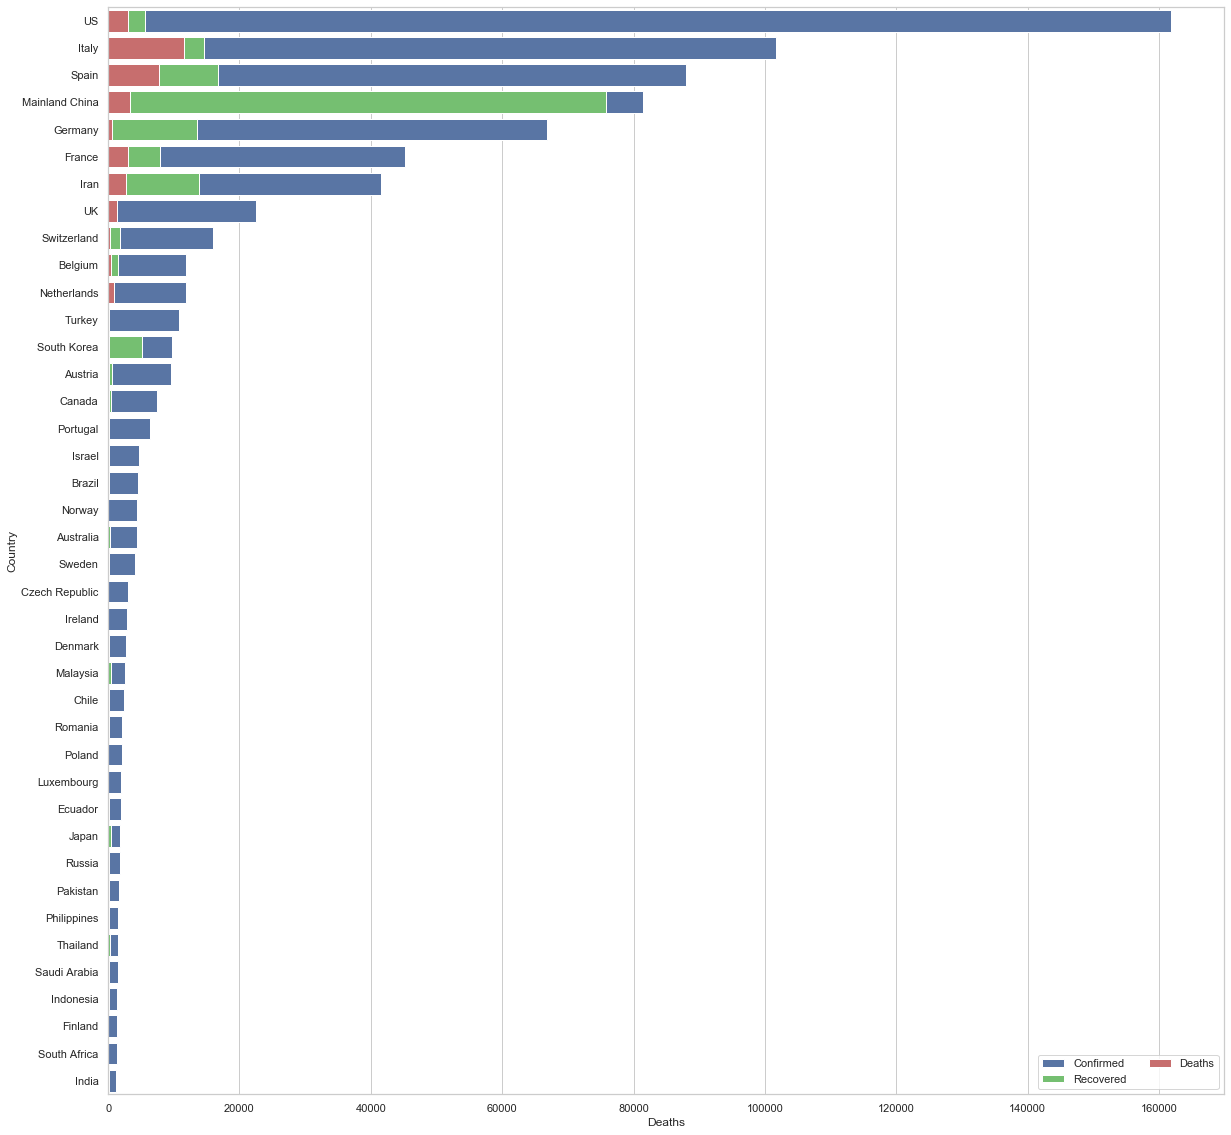

In [10]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20,20 ))

sns.barplot(x="Confirmed", y="Country", data=sorted_By_Confirmed.head(40),
            label="Confirmed", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Country", data=sorted_By_Confirmed.head(40),
            label="Recovered", color="g")

sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="Country", data=sorted_By_Confirmed.head(40),
            label="Deaths", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

In [11]:
df_Difference = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed','Deaths']].sum().reset_index()
sorted_By_Confirmed_Difference=df_Difference.sort_values('Country',ascending=False)

x1=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/29/2020'].reset_index().drop('index',axis=1)
x2=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/28/2020'].reset_index().drop('index',axis=1)

h=pd.merge(x2,x1,on='Country')
h['New Confirmed Cases']=h['Confirmed_y']-h['Confirmed_x']
h['New Deaths ']=h['Deaths_y']-h['Deaths_x']

h1=h.sort_values('New Confirmed Cases',ascending=False).head(138)
h1=h1.drop(['Confirmed_x','Deaths_x','Date_x','Confirmed_y','Deaths_y'],axis=1).style.background_gradient(cmap='Greens')
print("The New Cases in 29/03")
h1

The New Cases in 29/03


,Country,Date_y,New Confirmed Cases,New Deaths
10,US,03/29/2020,19408,441
26,Spain,03/29/2020,6875,821
97,Italy,03/29/2020,5217,756
117,Germany,03/29/2020,4400,100
101,Iran,03/29/2020,2901,123
121,France,03/29/2020,2603,294
11,UK,03/29/2020,2468,210
12,Turkey,03/29/2020,1815,23
162,Belgium,03/29/2020,1702,78
60,Netherlands,03/29/2020,1111,132


Text(0.5, 1.0, 'Total Cases / Deaths / Recovered')

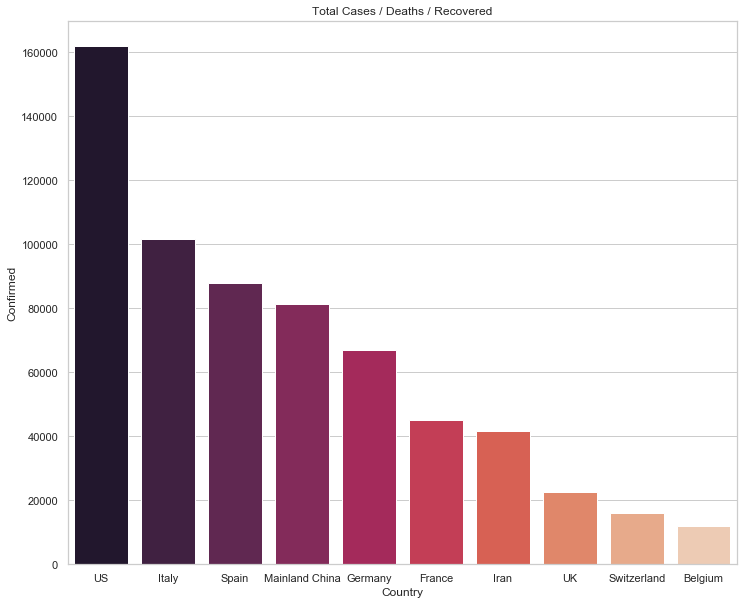

In [12]:
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases / Deaths / Recovered')  #graf çizdir (Most popular)

cases rate per country of total cases in the world 


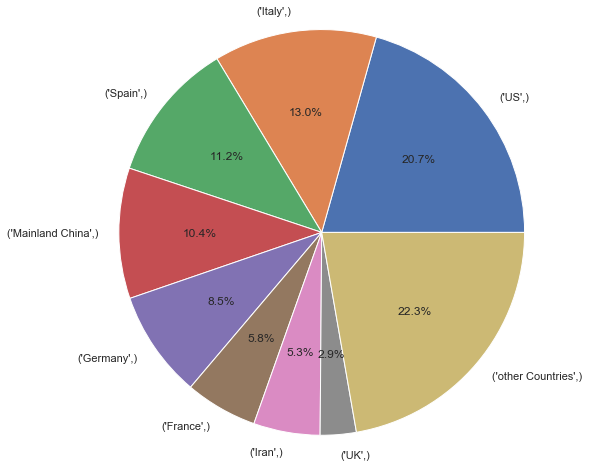

In [13]:
Top7=sorted_By_Confirmed.iloc[0:8,-1].values
others=sorted_By_Confirmed.iloc[8:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(9)] ,columns=['rate'])
rate_perCountry.rename(index={'Switzerland': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("cases rate per country of total cases in the world ")
plt.show()

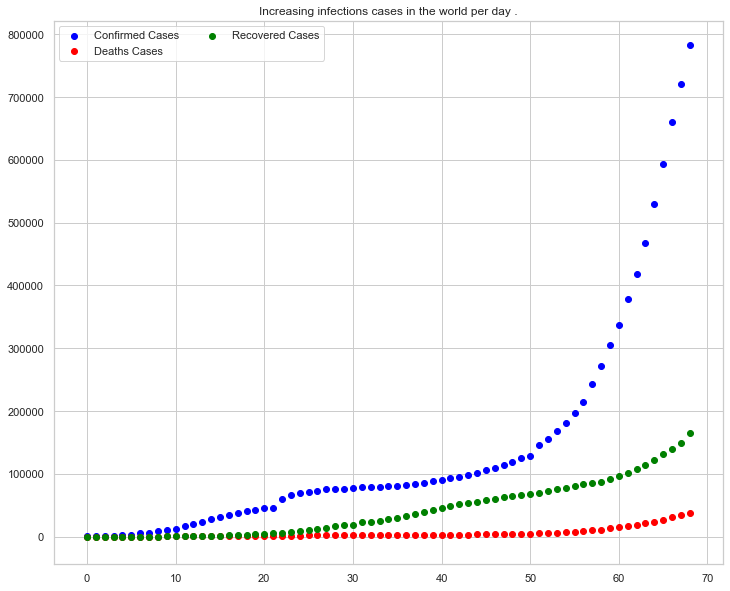

In [14]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10 ))

plt.scatter(x,y,color='blue' , label='Confirmed Cases')
plt.scatter(x,y1,color='red' ,label="Deaths Cases")
plt.scatter(x,y2,color='green',label="Recovered Cases")
plt.title("Increasing infections cases in the world per day .")
ax.legend(ncol=2, loc='upper left', frameon=True)
plt.show()

In [15]:
sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

,Date,Confirmed,Deaths,Recovered
68,03/30/2020,782365,37582,164566
67,03/29/2020,720117,33925,149082
66,03/28/2020,660706,30652,139415
65,03/27/2020,593291,27198,130915
64,03/26/2020,529591,23970,122150
63,03/25/2020,467594,21181,113770
62,03/24/2020,417966,18615,107705
61,03/23/2020,378287,16497,100958
60,03/22/2020,337020,14623,97243
59,03/21/2020,304528,12973,91676


In [16]:
cases_per_Day

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
...,...,...,...,...
64,03/26/2020,529591.0,23970.0,122150.0
65,03/27/2020,593291.0,27198.0,130915.0
66,03/28/2020,660706.0,30652.0,139415.0
67,03/29/2020,720117.0,33925.0,149082.0


In [17]:
x_data=pd.DataFrame(cases_per_Day.index)
y_data=pd.DataFrame(cases_per_Day.Confirmed)

In [18]:
x_data

,0
0,0
1,1
2,2
3,3
4,4
...,...
64,64
65,65
66,66
67,67


In [19]:
y_data

,Confirmed
0,555.0
1,653.0
2,941.0
3,1438.0
4,2118.0
...,...
64,529591.0
65,593291.0
66,660706.0
67,720117.0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

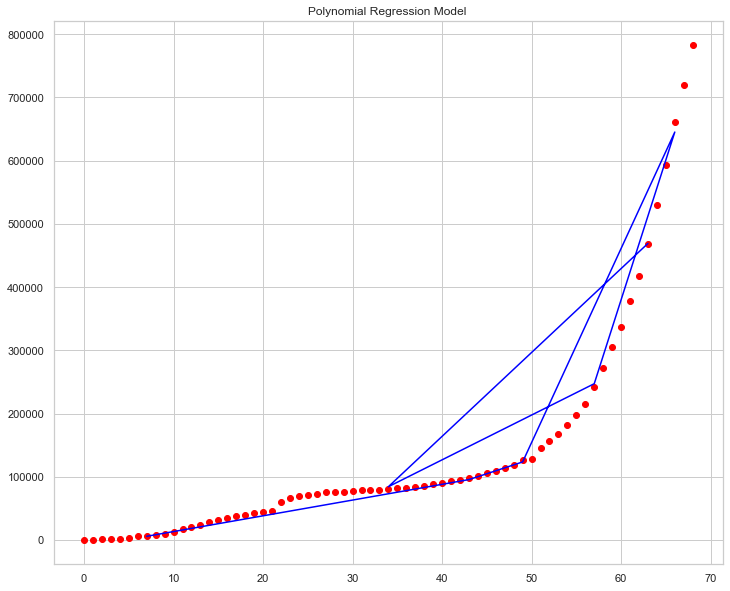

In [22]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed

plt.scatter(x,y,color='red')
plt.plot(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue')
plt.title("Polynomial Regression Model ")
plt.show()

In [23]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))

result=pd.DataFrame(y_pred)
result['Real Value']=y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_pred)
result=result[['Real Value','Predicted Value']]
result

,Real Value,Predicted Value
0,467594.0,469103.281070
1,80415.0,84222.755252
2,242713.0,247178.723334
3,660706.0,645295.352597
4,125865.0,123396.855039
5,97886.0,95468.891389
6,6165.0,5783.404364


In [24]:
from sklearn.metrics import r2_score

print('Polynomial Regession  R2 Score   : ',r2_score(y_test, y_pred))

Polynomial Regession  R2 Score   :  0.9991633157703909


In [25]:
print("After {0} day will be {1} case in the world".format((75-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[75]]))))
print("After {0} day will be {1} case in the world".format((77-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[77]]))))
print("After {0} day will be {1} case in the world".format((87-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[87]]))))
print("After {0} day will be {1} case in the world".format((97-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[97]]))))
print("After {0} day will be {1} case in the world".format((107-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[107]]))))

After 6 day will be [[1569485.59357616]] case in the world
After 8 day will be [[1881429.35188226]] case in the world
After 18 day will be [[4285555.25245512]] case in the world
After 28 day will be [[8683289.52523625]] case in the world
After 38 day will be [[16074355.13696135]] case in the world
